# Case Study of Salary Data Scientist Around the World <a id='intro'></a>

Technology is developing, time is advancing. The need for digital talent is increasing. This case study focuses on analyzing salary in the data field. The data is sourced from `Kaggle`, an open platform for sharing data. Here we summarize the objectives and formulation of the problem for this case, including:
1. What kind of `occupation` are in high demand?
2. Is there any effect that the difference between `location of residence` and `location of work` affects `average salary`?
3. What position (`experience level`) occupies a lot of job vacancies
4. What occupation produces the `highest average salary`?
5. How does the development of the `Full-time` type of employee compare to the `Contractor` type of employee?
6. Which country gives the `highest average salary` and `lowest average salary`?

# Content <a id='back'></a>

* [Intro](#intro)
* [Content](#back)
* [Stage 1. Pre-processing Data](#Cont1)
     * [1.1 Initialize Libraries](#Cont2)
     * [1.2 Load Dataset](#Cont3)
     * [1.3 Checking Dataset Duplication](#Cont4)
     * [1.4 Check the Unique Value Dataset](#Cont5)
     * [1.5 Fix the Dataset Columns](#Cont6)
     * [1.6 Changing Data Type](#Cont7)
* [Stage 2. Exploratory Data Analysis (EDA)](#Cont8)
     * [2.1 Distribution of Salary From Data Sector](#Cont9)
     * [2.2 Distribution of Job Interest Based on Remote Ratio](#Cont10)
     * [2.3 Distribution of Job Types and Experience Levels](#Cont11)
     * [2.4 Salary Distribution Based on Currency](#Cont12)
     * [2.5 Salary Distribution in USD Using a Histogram](#Cont13)
     * [2.6 Boxplot Analysis of Salary Against Type of Work](#Cont14)
     * [2.7 Average Salary by Type of Work](#Cont15)
     * [2.8 Average Salary Based on Company Size](#Cont16)
     * [2.9 Geospatial Analysis of Average Salary](#Cont17)
     * [2.10 Analysis of the Effect of Differences in Residence and Place of Work on Salary](#Cont18)
     * [2.11 Average Salary Based on Type of Employee](#Cont19)
* [Stage 3. General Conclusion](#Cont20)

# Pre-processing Data <a id='Cont1'></a>

Before doing the analysis, we need to do data processing to make it easier to process starting from `loading the library`, `dataset cleaning` and so on.

## Initialize Libraries <a id='Cont2'></a>

Some libraries needed are `pandas`, `plotly`, `matplotlib`, `seaborn` and `pycountry`. Let's load all the libraries.

In [1]:
# load libraries
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt
import pycountry

# set seaborn theme
sns.set_theme(palette='bright')

## Load Dataset <a id='Cont3'></a>

The dataset we have is only one file which is `ds_salary.csv`. Let's load the dataset.

In [2]:
# load dataset
df_salary = pd.read_csv('ds_salaries.csv')

# checking dataset
print(df_salary.info())

# show sample dataset
df_salary.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB
None


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


We can see that the dataset consists of `3755 rows` and `11 columns`. The dataset has `no missing values` and in the `sample data` it seems that some of the columns still use `abbreviations` for their values.

## Checking Dataset Duplication <a id='Cont4'></a>

Next we will check for dataset duplication.

In [3]:
# check for duplicates
df_salary.duplicated().sum()

1171

There are duplicates in the dataset of `1171 rows`, this could be because there are users who happen to have the same data as other users data. Considering that our dataset does not have a `user_id` as a differentiator, we let our dataset have duplicates.

## Check the Unique Value Dataset <a id='Cont5'></a>

Next, let's check the unique values in each of our dataset variables/columns, to make improvements in them. Let's check only columns with data type `object`.

In [4]:
# checking unique values for each column
for col in df_salary.columns:
    if df_salary[col].dtype == 'object':
        print(f'Unique Values [{col}] -->',df_salary[col].unique())

Unique Values [experience_level] --> ['SE' 'MI' 'EN' 'EX']
Unique Values [employment_type] --> ['FT' 'CT' 'FL' 'PT']
Unique Values [job_title] --> ['Principal Data Scientist' 'ML Engineer' 'Data Scientist'
 'Applied Scientist' 'Data Analyst' 'Data Modeler' 'Research Engineer'
 'Analytics Engineer' 'Business Intelligence Engineer'
 'Machine Learning Engineer' 'Data Strategist' 'Data Engineer'
 'Computer Vision Engineer' 'Data Quality Analyst'
 'Compliance Data Analyst' 'Data Architect'
 'Applied Machine Learning Engineer' 'AI Developer' 'Research Scientist'
 'Data Analytics Manager' 'Business Data Analyst' 'Applied Data Scientist'
 'Staff Data Analyst' 'ETL Engineer' 'Data DevOps Engineer' 'Head of Data'
 'Data Science Manager' 'Data Manager' 'Machine Learning Researcher'
 'Big Data Engineer' 'Data Specialist' 'Lead Data Analyst'
 'BI Data Engineer' 'Director of Data Science'
 'Machine Learning Scientist' 'MLOps Engineer' 'AI Scientist'
 'Autonomous Vehicle Technician' 'Applied Machine 

There are many abbreviations in some of the fields and there are also too many unique values in the `job_title` column.

## Fix the Dataset Columns <a id='Cont6'></a>

Let's fix the `'experience_level'`, `'employment_type'`, `'company_size'`, `'remote_ratio'` fields to have the appropriate values. We create the dictionary first.

In [5]:
# create dictionary for experience_level
dict_exp = {
    'SE': 'Senior Level',
    'EN': 'Entry Level',
    'EX': 'Executive Level',
    'MI': 'Mid Level'
}

# create dictionary for employment_type
dict_emp = {
    'FL': 'Freelancer',
    'CT': 'Contractor',
    'FT' : 'Full-time',
    'PT' : 'Part-time'
}

# create dictionary for company_size
dict_cmp ={
    'S': 'Small',
    'M': 'Medium',
    'L' : 'Large'
}

# create dictionary for remote_ratio
dict_remote = {
    0 : 'On-Site',
    50 : 'Half-Remote',
    100 : 'Full-Remote'
}

Next, let's apply it to each column in question.

In [6]:
# replace all values for experience_level with it's dictionary
df_salary['experience_level'] = df_salary['experience_level'].map(dict_exp)

# replace all values for employment_type with it's dictionary
df_salary['employment_type'] = df_salary['employment_type'].map(dict_emp)

# replace all values for company_size with it's dictionary
df_salary['company_size'] = df_salary['company_size'].map(dict_cmp)

# replace all values for remote_ratio with it's dictionary
df_salary['remote_ratio'] = df_salary['remote_ratio'].map(dict_remote)

Let's check again by using `unique` for each of these columns.

In [7]:
# rechecking unique values for each column
for col in df_salary.columns:
    if df_salary[col].dtype == 'object':
        if col == 'job_title' or col == 'salary_currency' or col == 'employee_residence' or col == 'company_location':
            continue
        else: 
            print(f'Unique Values [{col}] -->',df_salary[col].unique())

Unique Values [experience_level] --> ['Senior Level' 'Mid Level' 'Entry Level' 'Executive Level']
Unique Values [employment_type] --> ['Full-time' 'Contractor' 'Freelancer' 'Part-time']
Unique Values [remote_ratio] --> ['Full-Remote' 'On-Site' 'Half-Remote']
Unique Values [company_size] --> ['Large' 'Small' 'Medium']


These values are as expected. Next we will improve the `job_title` column by categorizing it into `7 groups` as follows.

In [8]:
# classification for job_tittle
def assign_job_category(job_title):
    data_analyst = ['Finance Data Analyst','Marketing Data Analyst','Power BI Developer','Data Analytics Consultant','Data Analytics Engineer','Data Analytics Lead','Product Data Analyst','Insight Analyst','BI Data Analyst','Data Analytics Specialist','BI Analyst','Financial Data Analyst','Lead Data Analyst','Staff Data Analyst','Business Data Analyst','Data Analyst','Analytics Engineer','Business Intelligence Engineer','Compliance Data Analyst']
    data_scientist = ['Staff Data Scientist','Product Data Scientist','Data Scientist Lead','Data Science Tech Lead','Data Science Engineer','Data Science Consultant','Data Science Lead','Lead Data Scientist','Applied Data Scientist','Research Scientist','Data Scientist','Applied Scientist','Research Engineer']
    data_engineering = ['Lead Data Engineer','ETL Developer','Cloud Data Engineer','Data Management Specialist','Marketing Data Engineer','Azure Data Engineer','Data Operations Engineer','Software Data Engineer','Data Infrastructure Engineer','Cloud Database Engineer','BI Data Engineer','Big Data Engineer','Data Strategist','Data Engineer','ETL Engineer']
    data_architecture = ['Cloud Data Architect','Big Data Architect','Data Modeler','Data Architect',]
    machine_learning = ['Lead Machine Learning Engineer','3D Computer Vision Researcher','Machine Learning Developer','NLP Engineer','Machine Learning Research Engineer','Computer Vision Software Engineer','Machine Learning Software Engineer','Deep Learning Engineer','Machine Learning Infrastructure Engineer','Deep Learning Researcher','AI Programmer','Applied Machine Learning Scientist','AI Scientist','Machine Learning Scientist','Machine Learning Researcher','AI Developer','ML Engineer','Machine Learning Engineer','Computer Vision Engineer','Applied Machine Learning Engineer']
    top_level = ['Principal Data Engineer','Head of Machine Learning','Principal Data Analyst','Principal Data Architect','Machine Learning Manager','Principal Machine Learning Engineer','Manager Data Management','Head of Data Science','Director of Data Science','Data Manager','Head of Data','Data Science Manager','Principal Data Scientist','Data Analytics Manager']

    if job_title in data_engineering:
        return "Data Engineering"
    elif job_title in data_scientist:
        return "Data Science"
    elif job_title in data_analyst:
        return "Data Analyst"
    elif job_title in machine_learning:
        return "Machine Learning"
    elif job_title in data_architecture:
        return "Data Architecture"
    elif job_title in top_level:
        return "Top Management"
    else:
        return "Other"

# apply function for job_tittle column
df_salary['job_title'] = df_salary['job_title'].apply(assign_job_category)

Let's check again by using `unique` in that column.

In [9]:
# rechecking unique values job_title column
df_salary['job_title'].unique()

array(['Top Management', 'Machine Learning', 'Data Science',
       'Data Analyst', 'Data Architecture', 'Data Engineering', 'Other'],
      dtype=object)

The categorization of these values is as expected.

## Changing Data Type <a id='Cont7'></a>

Next, we will change the data type in the `work_year` column from `integer` to `category` as follows.

In [10]:
# change data type for work_year from integer to category
df_salary['work_year'] = df_salary['work_year'].astype('category')

# checking data type
df_salary['work_year'].dtype

CategoricalDtype(categories=[2020, 2021, 2022, 2023], ordered=False)

It has been successfully converted to a categorical data type.

# Exploratory Data Analysis (EDA) <a id='Cont8'></a>

After the data is `clean-up`, then we will start exploring the data to find insights in it.

## Distribution of Salary From Data Sector <a id='Cont9'></a>

Here we will see the amount of `salary earned` during the `relevant years` based on the `type of work` available.

In [11]:
# distribution of salary_in_usd
pivot_year = df_salary.groupby(['work_year','job_title'])['salary_in_usd'].sum().reset_index()

# plot the graph
yearly = px.bar(
    pivot_year, 
    x="job_title", 
    y="salary_in_usd",
    color="work_year",
    text_auto=True, 
    title="USD Salary - Job Tittle",
    width=800,
    height=600)

# show the graph
yearly.update_layout(xaxis_tickangle=-30)
yearly.show()

From the graph above, the highest amount of salary was obtained by the fields of `Data Engineering` and `Data Science` with a value of almost touching `160M USD`. The graph shows that `Year 2023` contributes the most revenue compared to previous years.

## Distribution of Job Interest Based on Remote Ratio <a id='Cont10'></a>

Next, let's check the demand for jobs based on the `remote_ratio` criteria.

In [12]:
# group of remote_ratio
remote = df_salary.groupby(['work_year','remote_ratio'])['company_size'].count().reset_index()

# plot the graph
remote = px.bar(
    remote, 
    x="remote_ratio", 
    y="company_size",
    color="work_year",
    text_auto=True, 
    title="Work Type Distribution",
    width=700,
    height=500)

# show the graph
remote.update_layout(
    xaxis_title="Job Type - Remote",
    yaxis_title="Count")
remote.show()

In `2020` and `2021` there was an increase for `Full-Remote` work due to the `Covid-19 Pandemic` while as the pandemic began to end there was an increase for `On-Site` work in `2022` and `2023`.

## Distribution of Job Types and Experience Levels <a id='Cont11'></a>

Next, we will find out what `types of jobs` and `experience levels` are in `high demand` in 2020 to 2023.

In [13]:
# create pie for compositioning job_title and experience_level
pie = df_salary.groupby(['job_title','experience_level'])['work_year'].count().reset_index()

# plot the graph job title distribution
pie_job = px.pie(
    pie,
    names='job_title',
    values='work_year',
    hole=0.5,
    width=600,
    height=500,
    title="Job Title Composition 2020-2023",
)
pie_job.show()

# plot the graph job title distribution
pie_exp = px.pie(
    pie,
    names='experience_level',
    values='work_year',
    hole=0.5,
    width=600,
    height=500,
    title="Experience Level Composition 2020-2023",
)
pie_exp.show()

The `type of work` that is most in demand is the field of `Data Science` then `Data Engineering` and after. While many job level positions are filled by `Senior Level`, then `Mid Level` and after.

## Salary Distribution Based on Currency <a id='Cont12'></a>

Here we will find out the `popular` `currencies` and `unpopular` `currencies` for payments for data work.

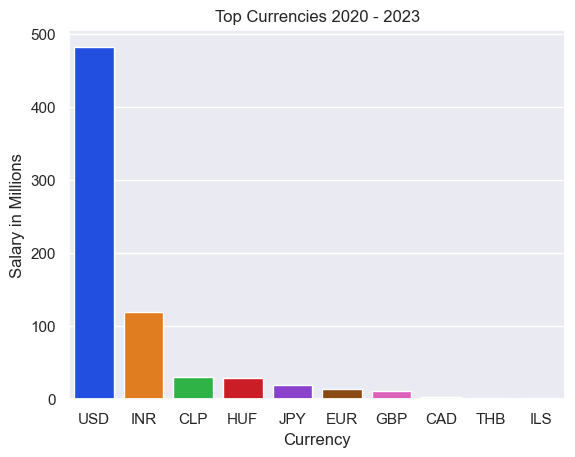

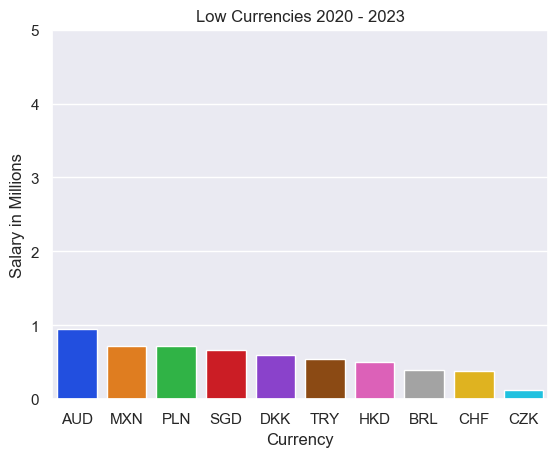

In [14]:
# grouping currency
currency = df_salary.groupby('salary_currency')['salary'].sum().sort_values(ascending=False).reset_index()
currency['salary'] = currency['salary']/1000000

# top up 10 currencies
sns.barplot(currency.head(10),x='salary_currency',y='salary')
plt.title('Top Currencies 2020 - 2023')
plt.xlabel('Currency')
plt.ylabel('Salary in Millions')
plt.show()

# low 10 currencies
sns.barplot(currency.tail(10),x='salary_currency',y='salary')
plt.title('Low Currencies 2020 - 2023')
plt.xlabel('Currency')
plt.ylabel('Salary in Millions')
plt.ylim(0,5)
plt.show()

It can be seen that the popular currency is `USD` with total salary of almost `500M USD` while the unpopular currency is `CZK` whose value is below `1M CZK`.

## Salary Distribution in USD Using a Histogram <a id='Cont13'></a>

Next we will find out the salary distribution based on `USD conversion` for our dataset using `histogram plot`.

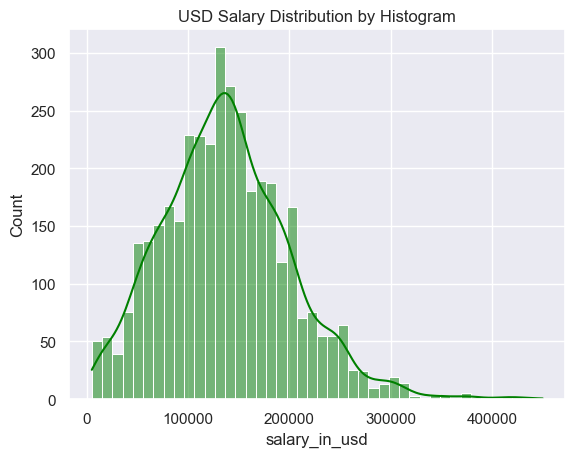

In [15]:
# distribution salary by histogram
hisplot = sns.histplot(df_salary['salary_in_usd'],kde=True,color='green')
plt.title('USD Salary Distribution by Histogram')

# show the graph
plt.show()

Based on the above chart it can be seen that the `average salary` is at `150000 USD` and rarely exceeds `400000 USD`.

## Boxplot Analysis of Salary Against Type of Work <a id='Cont14'></a>

Here we will do a boxplot analysis to see the distribution of `salary` based on the `type of work` in more detail.

In [16]:
# boxplot analysis usd_salary
boxplot = px.box(
    df_salary,
    y='job_title',
    x='salary_in_usd',
    color='job_title',
    title='Boxplot USD Salary - Job Title',
    width=800,
    height=600
    )
boxplot.update_traces(orientation='h')
boxplot.show()

It turns out that the type of work `Machine Learning` generates the most salary compared to other types of work (excluding `Top Management`). Some of the outliers seem reasonable enough, so we can use the `mean` value for further analysis.

## Average Salary by Type of Work <a id='Cont15'></a>

Next, let's look at the average salary based on the type of work.

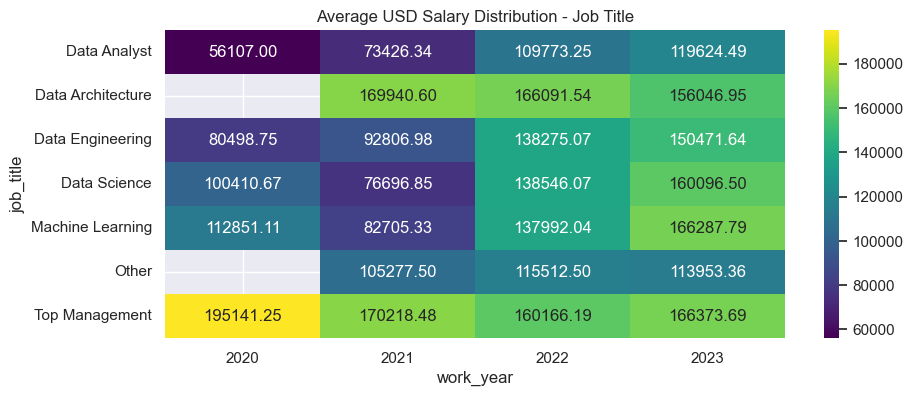

In [17]:
# average USD salary distribution among job title
pivot_table = df_salary.pivot_table(index='job_title',columns='work_year',values='salary_in_usd',aggfunc='mean')
plt.figure(figsize=(10,4))
sns.heatmap(pivot_table,annot=True ,fmt='.2f', cmap='viridis')
plt.title('Average USD Salary Distribution - Job Title')

# show the heatmap
plt.show()

It can be seen, almost all of the average salary has increased from year to year. The lowest average salary is for `Data Analyst` in `2020` while the highest salary is `Top Management` in `2020`.

## Average Salary Based on Company Size <a id='Cont16'></a>

Next, we will find out the `average salary` based on `company size`.

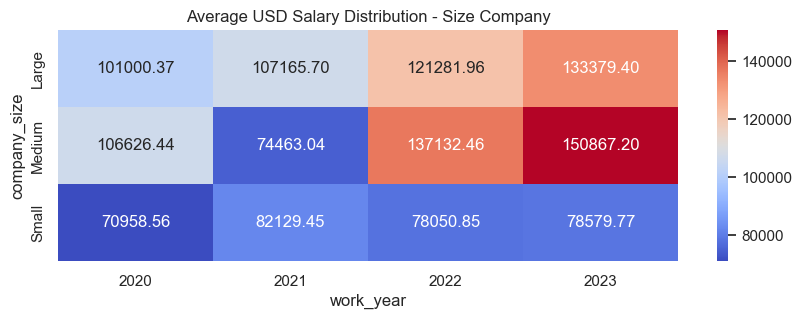

In [18]:
# average USD salary distribution among size company
pivot_table = df_salary.pivot_table(index='company_size',columns='work_year',values='salary_in_usd',aggfunc='mean')
plt.figure(figsize=(10,3))
sns.heatmap(pivot_table,annot=True ,fmt='.2f', cmap='coolwarm')
plt.title('Average USD Salary Distribution - Size Company')

# show the heatmap
plt.show()

On average for each `company size` from year to year the average salary increases. In `2023` for `medium companies` beat the average salary with companies of other sizes.

## Geospatial Analysis of Average Salary <a id='Cont17'></a>

Next we will know the average salary by `country area` and plot it in a `geospatial visualization`.

In [19]:
# get true name using pycountry
def getname(code):
    try:
        country = pycountry.countries.get(alpha_2=code).name
        return country
    except:
        return None

# apply the function to dataset
df_salary['company_location'] = df_salary['company_location'].apply(getname)
df_salary['employee_residence'] = df_salary['employee_residence'].apply(getname)

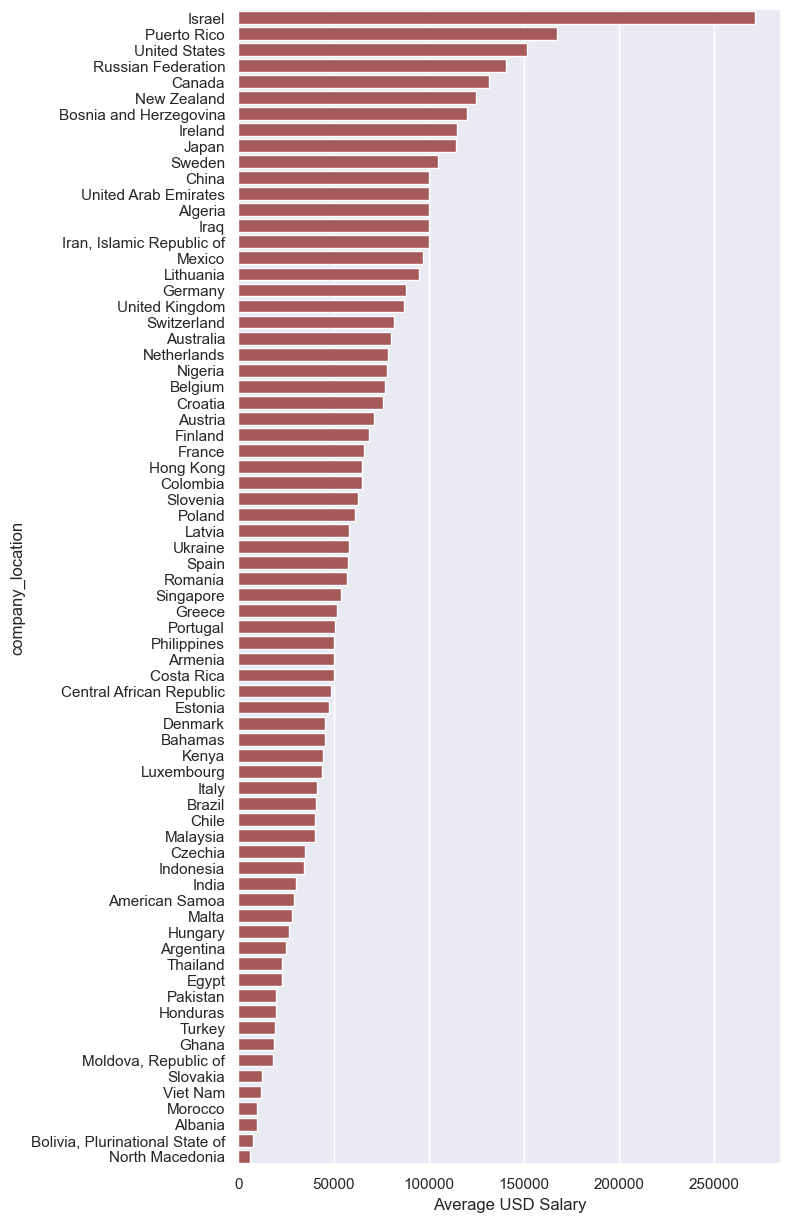

In [20]:
# choropleth distribution average salary in each country
country = df_salary.groupby('company_location',as_index=False)['salary_in_usd'].mean()

# plot the graph
fig1 = px.choropleth(country,
                     locations='company_location',
                     locationmode='country names',
                     color='salary_in_usd',
                     color_continuous_scale=px.colors.sequential.Cividis,
                     title='Average USD Salary by Country',
                     labels={'salary_in_usd': 'Average USD Salary'},
                     width=800,
                     height=500)

# show the geospatial graph
fig1.show()

# barplot distribution average salary in each country
plt.figure(figsize=(7,15))
sns.barplot(country.sort_values(by='salary_in_usd',ascending=False),x='salary_in_usd',y='company_location',color='red',saturation=0.3)

# show the barplot
plt.xlabel('Average USD Salary')
plt.show()

Based on the results of the plot above, the countries with the highest average salary are `Israel`, `Puerto Rico` and `United States`. Meanwhile, the countries with the lowest average salary were `North Macedonia`, `Bolivia` and `Albania`.

## Analysis of the Effect of Differences in Residence and Place of Work on Salary <a id='Cont18'></a>

Now we will find out whether there is a difference in the `average salary` for workers who have a different place of residence from where he works.

In [21]:
# different employee_residence with company_location
different = df_salary[df_salary['company_location'] != df_salary['employee_residence']]
different = different.groupby('remote_ratio')['salary_in_usd'].mean().reset_index()

# same employee_residence with company_location
same = df_salary[df_salary['company_location'] == df_salary['employee_residence']]
same = same.groupby('remote_ratio')['salary_in_usd'].mean().reset_index()

fig3 = go.Figure()
fig3.add_trace(go.Bar(
    x=different['remote_ratio'],
    y=different['salary_in_usd'],
    name='Different Country',
    marker_color='rgb(120, 169, 137)',
))
fig3.add_trace(go.Bar(
    x=same['remote_ratio'],
    y=same['salary_in_usd'],
    name='Same Country',
    marker_color='rgb(151, 88, 144)'
))

# Here we modify the tickangle of the xaxis, resulting in rotated labels.
fig3.update_layout(
    width=700, 
    height=500, 
    title='Average USD Salary - Job Type (Remote)',
    xaxis_title="Job Type - Remote",
    yaxis_title="Salary in USD"
    )
fig3.show()

We can see that the location of work affects the amount of average salary where a `worker who has the same place of residence and place of work has a higher average` compared to `workers who have a place of residence and a different place of work`.

## Average Salary Based on Type of Employee <a id='Cont19'></a>

Next, we will find out the `average salary` based on the type of employee working.

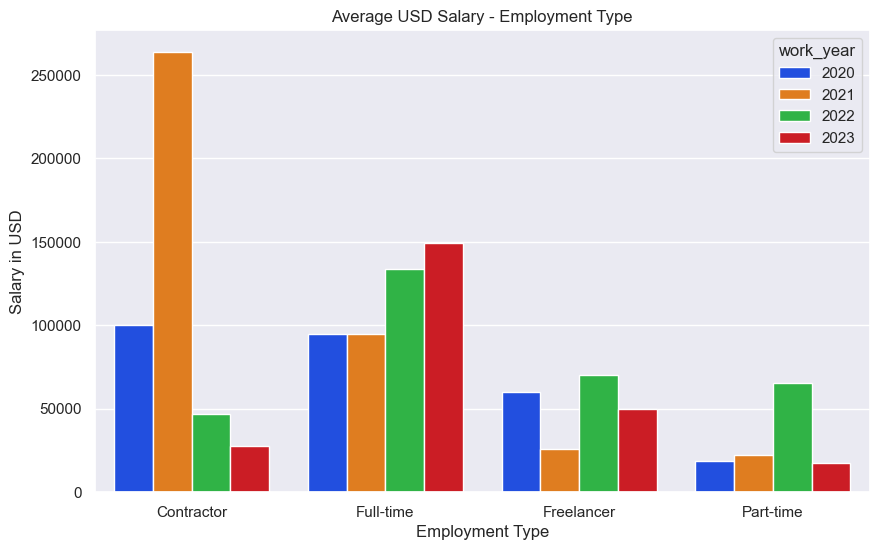

In [22]:
# average USD salary based on employment_type
emp_sal = df_salary.groupby(['work_year','employment_type'])['salary_in_usd'].mean().sort_values(ascending=False).reset_index()

# # barplot graph
plt.figure(figsize=(10,6))
sns.barplot(emp_sal,x='employment_type',y='salary_in_usd',hue='work_year')

# show the graph
plt.title('Average USD Salary - Employment Type')
plt.xlabel('Employment Type')
plt.ylabel('Salary in USD')
plt.show()

It can be seen that employees with the `Full-time` type have an `average salary` that increases every year and a higher average salary value compared to other types of employees. The type of `Contractor` employee has decreased almost every year, perhaps due to the pandemic that has subsided and many offices opening up `Full-time` job vacancies.

# General Conclusion <a id='Cont19'></a>

We have done data pre-processing, starting from `loading library`, `cleaning dataset`, `checking for duplicates`, `changing values` and `data types`. Then proceed with doing `Explorative Data Analysis (EDA)` to look for insights in it. We draw the following conclusions:
- The highest amount of salary was obtained by the fields of `Data Engineering` and `Data Science` with a respective value of almost touching `160M USD` for the range `2020 - 2023`.
- The type of work that is in great demand is the field of `Data Science`. While many job level positions are filled by `Senior Level` circles.
- The `popular` currency is `USD` while the `unpopular` currency is `CZK` as a medium of payment for employee salary.
- Based on the histogram graph, it can be seen that the average employee salary is at `150000 USD` and rarely exceeds `400000 USD`.
- Based on boxplot analysis, `Machine Learning` jobs provide the largest average salary compared to the average salary of other fields.
- The average company size from year to year has experienced an increase in average salary. In `2023` for `medium companies` beat the average salary with companies of other sizes.
- The countries with the highest average salary are `Israel`, `Puerto Rico` and `United States`. Meanwhile, the countries with the lowest average salary were `North Macedonia`, `Bolivia` and `Albania`.
- The location of the place of work affects the amount of average salary where a `worker who has the same place of residence and place of work has a higher average` than `workers who have a place of residence and place of work that is different`.
- Employees with the `Full-time` type have an average salary that increases every year and a higher average salary value compared to other types of employees. The type of `Contractor` employee has decreased almost every year, perhaps due to the pandemic that has subsided and many offices opening up `Full-time` job vacancies.